### SWARM NIMO

In [1]:
import pandas as pd
from datetime import datetime, timedelta
# Self Created Functions --------------------------
# Swarm downlaod and load functions
from download_swarm import download_and_unzip

# Plotting NIMO and Swarm together
from NIMO_Swarm_Map_Plotting import find_all_gaps, NIMO_SWARM_mapplot
from NIMO_SWARM_single import nimo_swarm_single_plot

#### Example of Downloading Swarm File
Function : download_swarm.download_and_unzip <br>
Required Parameters  <br>
<blockquote> ymd : datetime <br>
 satellite : string 'A', B', or 'C' <br> 
<blockquote> Any other satellite letter will return file does not exist <br> </blockquote>
 out_dir : string directory for output <br>  </blockquote>
Key Word Arguments <br>
 <blockquote> 
 bse_url : URL where data can be found <br>
<blockquote>
    Defualt 'https://swarm-diss.eo.esa.int/?do=download&file=swarm%2FLevel' <br>
    The base URL to use can be found by going to https://swarm-diss.eo.esa.int/# <br>
    and navigating to desired file, right clicking and choosing "Copy Link Address" <br>
    Use string before the level is specified <br> </blockquote>
    
 level : product level <blockquote>
     Default '1b' can also use '2daily'<br> </blockquote>
 baseline : product baseline <blockquote>
     'Latest_baselines' is recommended, has not been tested for 'Entire Mission Data' <br>
     </blockquote>
 instrument: Instrument type <blockquote>
     Default 'EFI' (Electric Field Instruments <br> </blockquote>
 instrument2: Speficic instrument <blockquote>
     Default 'LP' (Langmuir Probe) <br> </blockquote>
 f_end : file ending <blockquote>
     Default '0602_MDR_EFI_LP' <br>
     0602 represents the file version <br>
     MDR_EFI_LP represents the Record Type <br> </blockquote>
 T1 string starting time <blockquote>
     Default '000000' (midnight) <br>
     MOST swarm files will follow this format but NOT ALL </blockquote> <br>
 T2 string ending time <blockquote>
     Default '235959' (1 minute before midnight) <br>
     MOST swarm files will follow this format but NOT ALL </blockquote> <br>
 num_days : number of days that will be downloaded after initial file <br> <blockquote>
     Default is 0 </blockquote>
 </blockquote>
 File will be downloaded if it does not already exist in out_dir <br>
 File will not be downlaoded if that filename dows not exist on Swarm website  <br>
 NOTE: often if a file does not exist, it is because T1 is not '000000' and <br>
 T2 is not '235959' <br>
 If that is the case, check the Swarm Data Website to find the proper times <br>

In [3]:
out_dir = '~/swarm_data/'
fdate = datetime(2020, 12, 29)
download_and_unzip(fdate, 'A', out_dir)

Downloading: SW_OPER_EFIA_LP_1B_20201229T000000_20201229T235959_0602.CDF.ZIP
Extracted to: /Users/aotoole/Documents/Python_Code/EFI/Sat_A/2020/20201229


#### Single NIMO/Swarm Plot Example
Function NIMO_SWARM_single.nimo_swarm_single_plot <br>
This makes a single plot for Swarm and NIMO as close to the provided time as possible <br>
If Swarm file is not found then it will attempt to download<br>
<br>
Required Parameters  <br>
<blockquote>
 stime : datetime to plot <br>
 satelltie : string 'A', B', or 'C' for Swarm <br>
 swarm_file_dir : file directory for Swarm data <br>
 nimo_file_dir : file directory for NIMO data <br>
</blockquote>
Key Word Arguments <br>
<blockquote> 
 MLat : Magnetic Latitude cutoff <blockquote>
     $30^\circ$ Default </blockquote>
 swarm_filt : filter for swarm data <blockquote>
    Default is 'barrel_average' <br> </blockquote>
 swarm_interpolate : linear interpolation parameter <blockquote>
        the number of data points will incrase by swarm_interpolate <br>
        Default is 1 (no interpolation) <br> </blockquote>
 swarm_envelope : boolean <blockquote>
    determines if an envelope is used if barrel is in filter <br>
    Default is True </blockquote>
 swarm_barrel : double deteriming magnetic latitude radius of barrel <blockquote>
    Default is $3^\circ$ </blockquote>
 swarm_window : double determing magnetic latitude moving average window size <blockquote>
    Default is $2^\circ$ </blockquote>
 nimo_filt : filter for nimo data <blockquote>
     Default '' (no filter) </blockquote>
 nimo_interpolate : linear interpolation parameter <blockquote>
        the number of data points will incrase by swarm_interpolate <br>
        Default is 2 (doubles number of points) <br> </blockquote>
 nimo_envelope : boolean <blockquote>
    determines if an envelope is used if barrel is in filter <br>
    Default is False (no envelope) </blockquote>
 nimo_barrel : double deteriming magnetic latitude radius of barrel <blockquote>
    Default is $3^\circ$ </blockquote>
 nimo_window : double determing magnetic latitude moving average window size <blockquote>
     Default is $3^\circ$ </blockquote>
 fosi : int for plot font size <blockquote>
     Default 18 <br>
     Exceptions: <blockquote>
         Super Title (fosi + 10) <br>
         legends (fosi - 3) </blockquote> </blockquote>
out_dir : string of output directory <blockquote>
    if it is left empty ('' default), then cwd will be used </blockquote>
nimo_name_format : string specifying nimo filename before '.nc' <blockquote>
    Default is 'NIMO_AQ_%Y%j' </blockquote>
 *_var : str of variable names for NIMO <blockquote>
        variable names to be opened in the NIMO file <br>
        * ne, lon, lat, alt, hr, min, tec, hmf2, nmf2 <br>
        Defaults <blockquote>
            electron density - 'dene' <br>
            geo longitude - 'lon'<br>
            geo latitude - 'lat' <br>
            altitude - 'alt'<br>
            hour - 'hour'<br>
            minute - 'minute'<br>
            TEC - 'tec'<br>
            hmf2 - 'hmf2'<br>
            nmf2 - 'nmf2' </blockquote> </blockquote>
 nimo_cadence: int <blockquote>
        time cadence of NIMO data in minutes <br>
        default is 15 minutes </blockquote>
 max_tdif : double <blockquote>
        maximum time distance (in minutes) between a NIMO and Swarm <br>
        conjunction allowed (default 15) </blockquote> </blockquote>

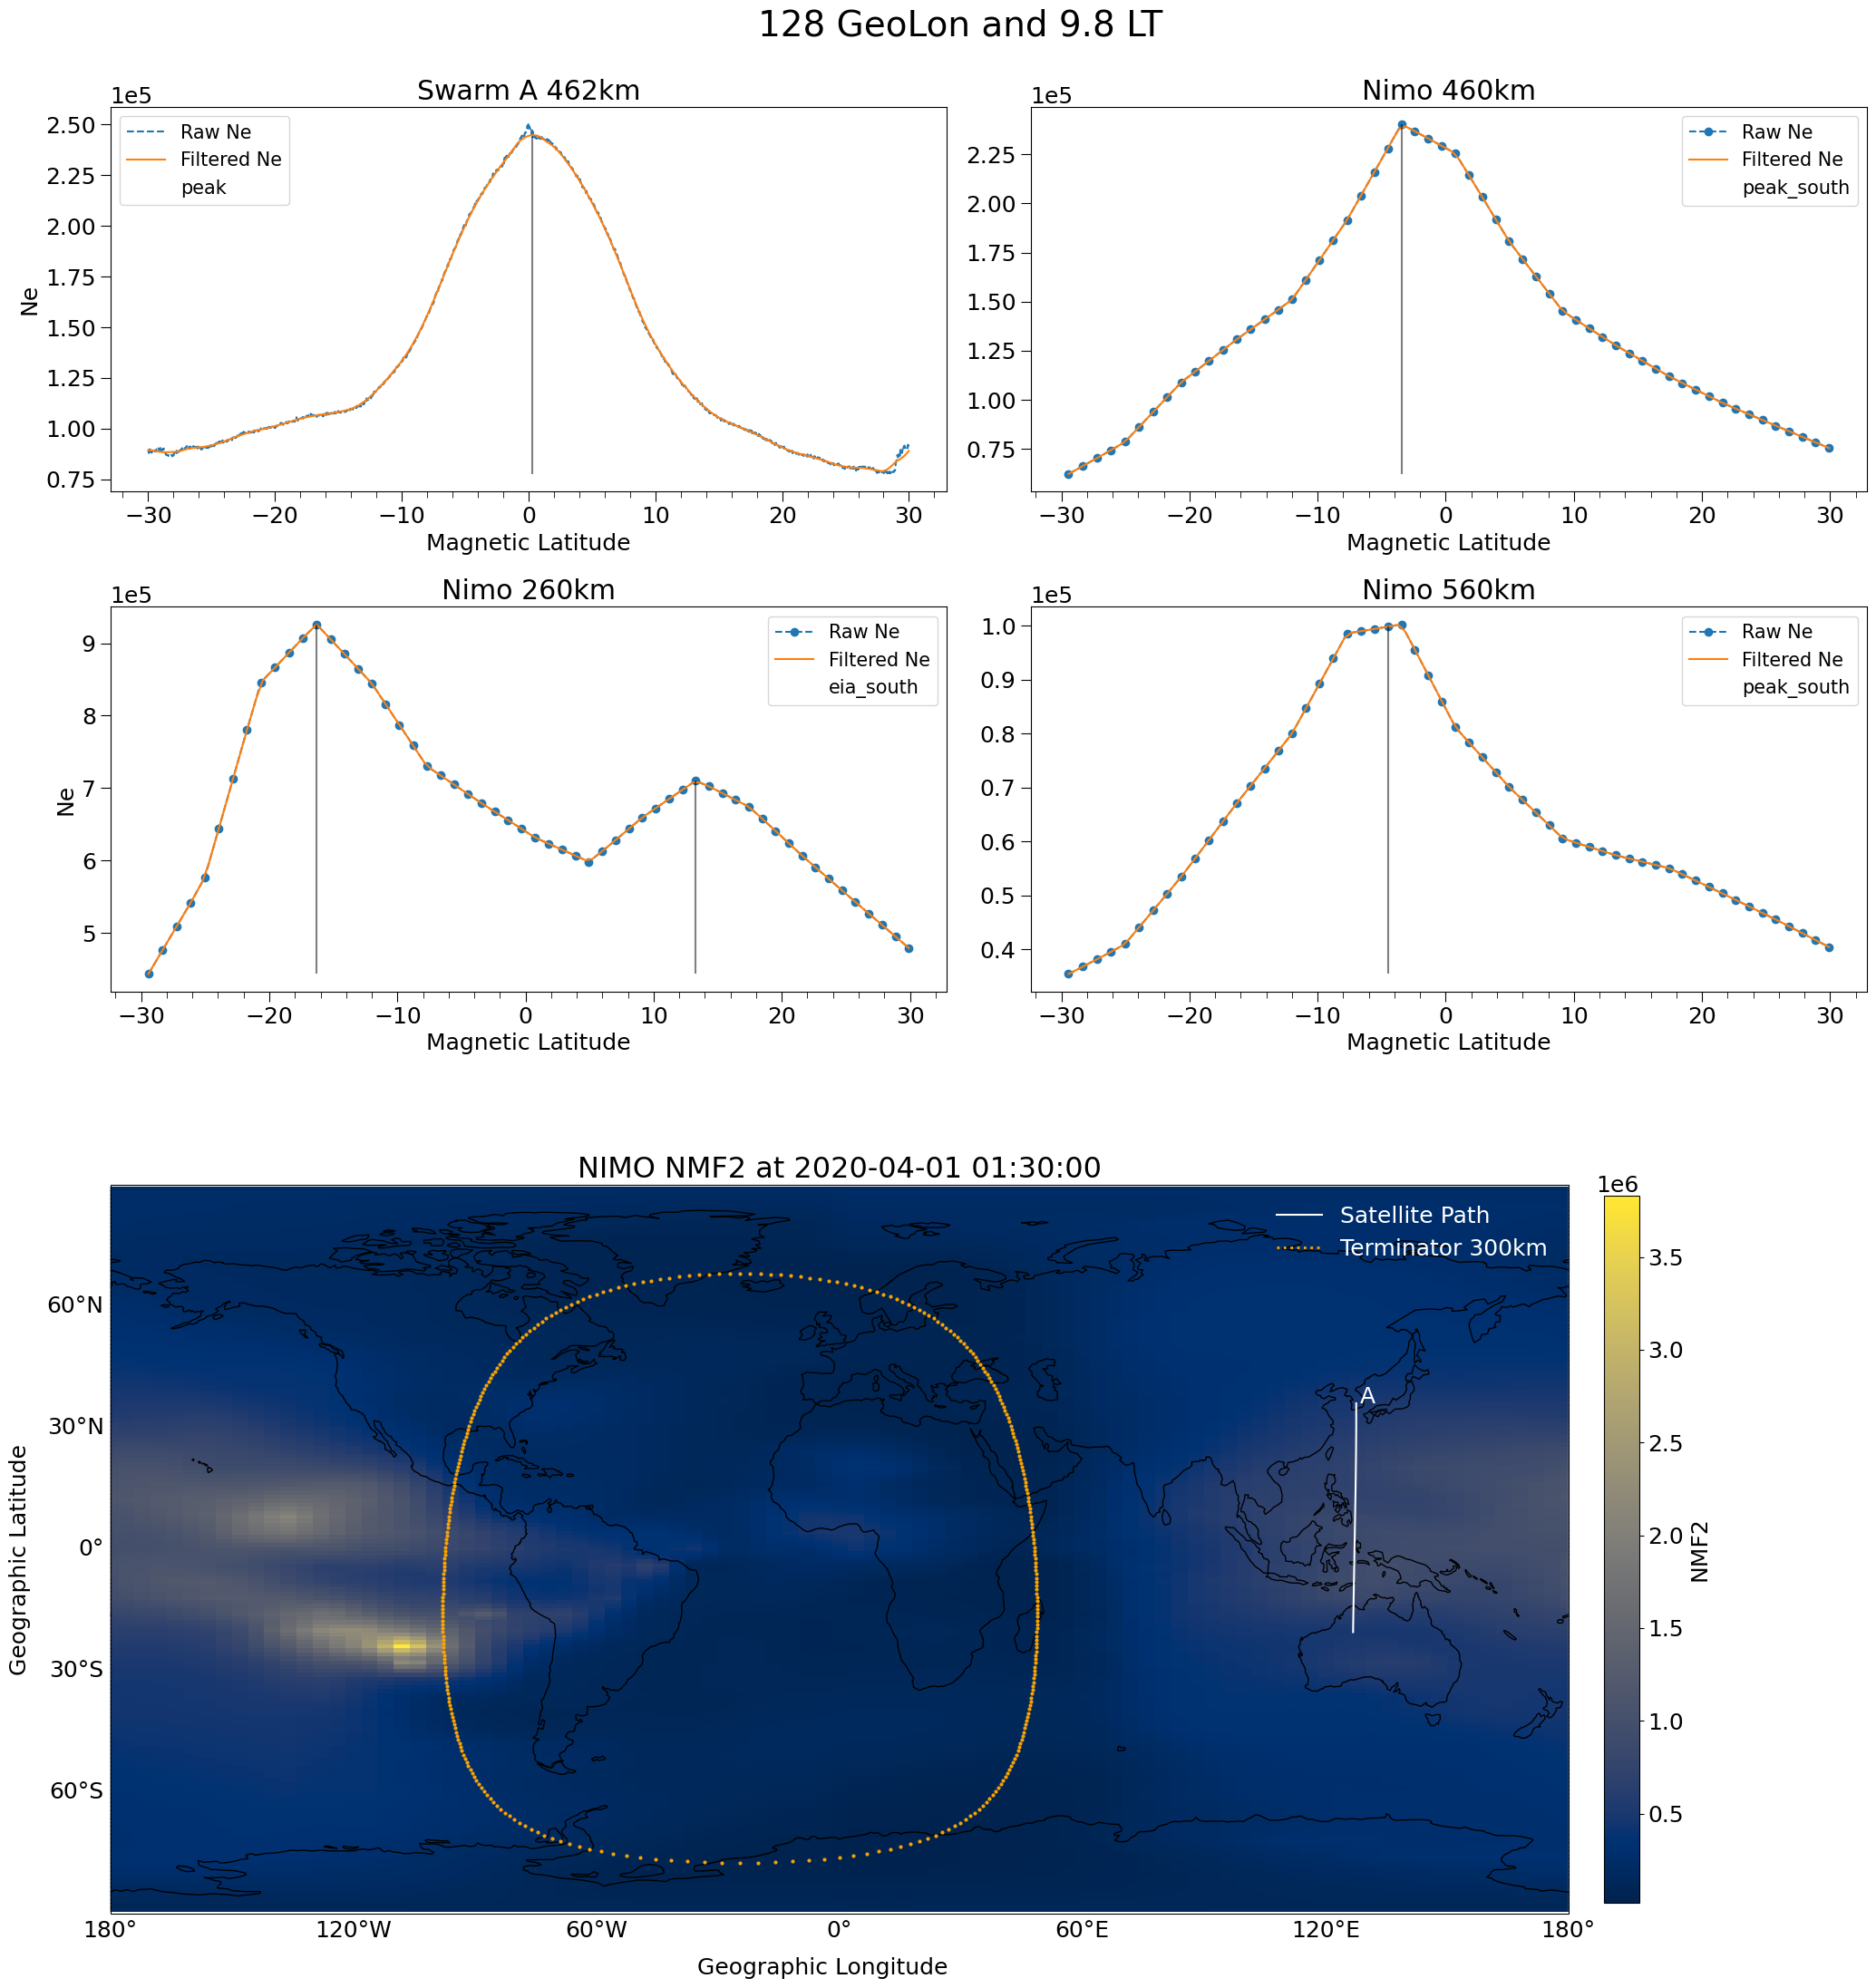

In [2]:
swarm_fdir = '~/swarm_data'
nimo_fdir = '~/NIMO/*'
stime = datetime(2020, 4, 1,1,17)
satellite = 'A'
nimo_swarm_single_plot(stime, satellite, swarm_fdir, nimo_fdir);

#### Creating Daily Figs and Daily Files
Function NIMO_Swarm_Map_Plotting.NIMO_SWARM_mapplot <br>
This function creates daily files and figures for SWARM (all_satellites) and NIMO conjunctions <br>
Returns adataframe of the information that goes into the daily file<br>
<br>
Required Parameters  <br>
<blockquote>
 start_day : datetime (day to create file for) <br>
 swarm_file_dir : file directory for Swarm data <br>
 nimo_file_dir : file directory for NIMO data <br>
</blockquote>
Key Word Arguments <br>
<blockquote> 
 MLat : Magnetic Latitude cutoff <blockquote>
     $30^\circ$ Default </blockquote>
 file_dir: string of output directory for file<blockquote>
    if it is left empty ('' default), then cwd will be used </blockquote>
 fig_dir: string of output directory for figures <blockquote>
    if it is left empty ('' default), then cwd will be used </blockquote>
 fig_on : boolean specifying whether or not to make the file Default True <br>
 swarm_filt : filter for swarm data <blockquote>
    Default is 'barrel_average' <br> </blockquote>
 swarm_interpolate : linear interpolation parameter <blockquote>
        the number of data points will incrase by swarm_interpolate <br>
        Default is 1 (no interpolation) <br> </blockquote>
 swarm_envelope : boolean <blockquote>
    determines if an envelope is used if barrel is in filter <br>
    Default is True </blockquote>
 swarm_barrel : double deteriming magnetic latitude radius of barrel <blockquote>
    Default is $3^\circ$ </blockquote>
 swarm_window : double determing magnetic latitude moving average window size <blockquote>
    Default is $2^\circ$ </blockquote>
 nimo_filt : filter for nimo data <blockquote>
     Default '' (no filter) </blockquote>
 nimo_interpolate : linear interpolation parameter <blockquote>
        the number of data points will incrase by swarm_interpolate <br>
        Default is 2 (doubles number of points) <br> </blockquote>
 nimo_envelope : boolean <blockquote>
    determines if an envelope is used if barrel is in filter <br>
    Default is False (no envelope) </blockquote>
 nimo_barrel : double deteriming magnetic latitude radius of barrel <blockquote>
    Default is $3^\circ$ </blockquote>
 nimo_window : double determing magnetic latitude moving average window size <blockquote>
     Default is $3^\circ$ </blockquote>
 fosi : int for plot font size <blockquote>
     Default 18 <br>
     Exceptions: <blockquote>
         Super Title (fosi + 10) <br>
         legends (fosi - 3) </blockquote> </blockquote>
nimo_name_format : string specifying nimo filename before '.nc' <blockquote>
    Default is 'NIMO_AQ_%Y%j' </blockquote>
 *_var : str of variable names for NIMO <blockquote>
        variable names to be opened in the NIMO file <br>
        * ne, lon, lat, alt, hr, min, tec, hmf2, nmf2 <br>
        Defaults <blockquote>
            electron density - 'dene' <br>
            geo longitude - 'lon'<br>
            geo latitude - 'lat' <br>
            altitude - 'alt'<br>
            hour - 'hour'<br>
            minute - 'minute'<br>
            TEC - 'tec'<br>
            hmf2 - 'hmf2'<br>
            nmf2 - 'nmf2' </blockquote> </blockquote>
 nimo_cadence: int <blockquote>
        time cadence of NIMO data in minutes <br>
        default is 15 minutes </blockquote>
 max_tdif : double <blockquote>
        maximum time distance (in minutes) between a NIMO and Swarm <br>
        conjunction allowed (default 15) </blockquote> </blockquote>


In [3]:
fig_dir='~/Plots/NIMO_SWARM'
file_dir='~/Type_Files/Daily'
swarm_fdir = '~/swarm_data'
nimo_fdir='~/Python_Code/data/NIMO/'
mlat_val = 30
stime1 = datetime(2020, 4,1,0,0)  # Starting Date
for i in range(30):  # How many days you want to make files for
    stime = stime1 + timedelta(days=i)
    print(stime)
    df_big = NIMO_SWARM_mapplot(stime,swarm_fdir, nimo_fdir, MLat=mlat_val,
                                file_dir=file_dir, fig_on=True,
                                fig_dir=fig_dir) 

2020-04-01 00:00:00
2020-04-02 00:00:00
2020-04-03 00:00:00
2020-04-04 00:00:00
2020-04-05 00:00:00
Odd Orbit longitude span > 5 degrees: Skipping Pass
2020-04-06 00:00:00
Odd Orbit longitude span > 5 degrees: Skipping Pass
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00
Odd Orbit longitude span > 5 degrees: Skipping Pass
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
Odd Orbit longitude span > 5 degrees: Skipping Pass
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
Odd Orbit longitude span > 5 degrees: Skipping Pass
2020-04-18 00:00:00
2020-04-19 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-22 00:00:00
Odd Orbit longitude span > 5 degrees: Skipping Pass
2020-04-23 00:00:00
2020-04-24 00:00:00
2020-04-25 00:00:00
Odd Orbit longitude span > 5 degrees: Skipping Pass
Odd Orbit longitude span > 5 degrees: Skipping Pass
2020-04-26 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020

### Swarm vs PyIRI at NIMO Conjunctions

In [5]:
from datetime import datetime, timedelta
# Self Created Function
# PyIRI daily files and plotting function
from SwarmPyIRI import PyIRI_NIMO_SWARM_plot

#### PyIRI daily Files at Nimo Conjunctions
Function SwarmPyIRI.PyIRI_NIMO_SWARM_plot <br>
This function creates daily plots and a daily file <br>
based on the NIMO-Swarm conjunctions found in the <br>
NIMO Swarm daily files <br>

Required parameters <blockquote>
sday: datetime <blockquote>
    (day starting at 0,0) </blockquote>
daily_dir : str <blockquote>
    directory of daily files made by
    NIMO_Swarm_Map_Plotting.NIMO_SWARM_mapplot </blockquote>
swarm_dir : str <blockquote>
    Swarm data directory to which data will be downloaded into an <br>
    appropriate date/satellite directory structure </blockquote>
</blockquote>
<br>
Key Word Arguments <blockquote>
file_save_dir : str kwarg <blockquote>
    directory where file should be saved, default cwd </blockquote>
fig_on : kwarg bool <blockquote>
    set to true, plot will be made, if false, plot will not be made </blockquote>
fig_save_dir : str kwarg <blockquote>
    directory where figure should be saved, default cwd </blockquote>
pyiri_filt : str kwarg <blockquote>
    Desired Filter for nimo data (no filter default) </blockquote>
pyiri_interpolate : int kwarg <blockquote>
    int that determines the number of data points in interpolation <br>
    new length will be len(density)xinterpolate <br>
    default is 2 </blockquote>
pyiri_envelope : bool kwarg <blockquote>
    if True, barrel roll will include points inside an <br>
    envelope, if false (default), no envelope will be used </blockquote>
pyiri_barrel : double <blockquote>
    latitudinal radius of barrel for swarm (default: 3 degrees maglat) </blockquote>
pyiri_window : double kwarg <blockquote>
    latitudinal width of moving window (default: 3 degrees maglat) </blockquote>
fosi : int kwarg <blockquote>
    fontsize for plot (default is 18) <br>
    Exceptions: <blockquote>
        Super Title (fosi + 10) <br>
        legends (fosi - 3) </blockquote></blockquote></blockquote>
<br>
The returns include daily files, figures (if fig_on), <br>
and a dataframe with what is contained in the daily files

In [8]:
daily_files = '~/Type_Files/Daily'
pyiri_fig_dir = '~/Plots/NIMO_SWARM/'
pyiri_file_dir = '~/Type_Files/Daily/'

stime1 = datetime(2020, 4,1,0,0) # Starting Date
for i in range(30):  # How many days you want to make files for
    stime = stime1 + timedelta(days=i)
    print(stime)
    iridf,dailydf = PyIRI_NIMO_SWARM_plot(stime, daily_files,swarm_fdir, fig_on=True, fig_save_dir=pyiri_fig_dir,
                          file_save_dir=pyiri_file_dir)

2020-04-01 00:00:00
2020-04-02 00:00:00
2020-04-03 00:00:00
2020-04-04 00:00:00
2020-04-05 00:00:00
2020-04-06 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-18 00:00:00
2020-04-19 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-22 00:00:00
2020-04-23 00:00:00
2020-04-24 00:00:00
2020-04-25 00:00:00
2020-04-26 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020-04-30 00:00:00


#### What still needs to be done?
Create separate PyIRI plots with maps